In [1]:
import pyspark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
12,application_1648925198225_0016,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3.7",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
          "spark.driver.maxResultSize":"15g"
         }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
13,application_1648925198225_0017,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
13,application_1648925198225_0017,pyspark,idle,Link,Link,None,✔


In [3]:
sc.install_pypi_package("pandas==1.2.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4c/33/87b15a5baeeb71bd677da3579f907e97476c5247c0e56a37079843af5424/pandas-1.2.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [4]:
sc.install_pypi_package("IPython")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/38/7a/4cb724163ceb72183dc41a267e28be3e8412fdb036e6d7ce806136a6112f/ipython-7.32.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a6/2d/2230afd570c70074e80fd06857ba2bdc5f10c055bd9125665fe276fadb67/matplotlib_inline-0.1.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/39/7b/88dbb785881c28a102619d46423cb853b46dbccc70d3ac362d99773a78ce/pexpect-4.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d5/50/83c593b07763e1161326b3b8c6686f0f4b0f24d5526546bee538c89837d6/decorator-5.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/37/46/be8a3c030bd3673f4800fa7f46eda972dfa2990089a51ec5dd0a26ed33e9/traitlets-5.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b3/0e/836f12ec50075161e365131f13f5758451645af75c2becf61c6351ecec39/jedi-0.18.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/00/e4/

In [5]:
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/19/7a/60bd79c5d79559150f8bba866dd7d434f0a170312e4d15e8aefa5faba294/matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/80/c1/23fd82ad3121656b585351aba6c19761926bb0db2ebed9e4ff09a43a3fcc/pyparsing-3.0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/50/9a9a94afa26c50fc5d9127272737806990aa698c7a1c220b8e5075e70304/kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/6b/44f7f8f1e110027cf88956b59f2fad776cca7e1704396d043f89effd3a0e/typing_extensions-4.1.1-py3-none-any.whl

You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [6]:
import pandas
from pyspark.sql.functions import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
review = spark.read.orc("hdfs:///NLP-orc/*.orc")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- cool: long (nullable = true)
 |-- funny: long (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)

In [9]:
gr_star = review.groupBy("stars").count()
gr_star_df = gr_star.sort(["stars"]).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
gr_star_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   stars    count
0    1.0  1262800
1    2.0   711378
2    3.0   926656
3    4.0  1920037
4    5.0  3814532

In [11]:
import matplotlib.pyplot as plt
# plt = plt.bar(x=gr_star_df["stars"], y=gr_star_df["count"],height = 0.8, width=0.8) # bottom=None, align='center', data=gr_star_df)  

#gr_star_df.plot(kind='bar')

plt.clf()
gr_star_df.plot(kind='bar', x='stars',y='count', legend=None, figsize=(8,6))
plt.title('Number of text rows for star rating')
plt.xlabel('Star Rating')
plt.ylabel('Text rows count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Text rows count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

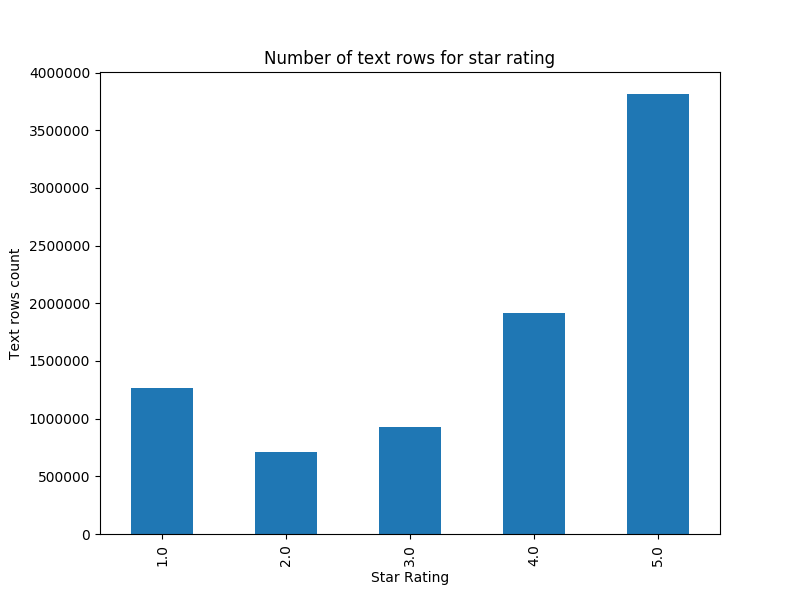

In [12]:
%matplot plt

In [13]:
review.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in review.columns]).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+-----+----+------+
|cool|funny|stars|text|useful|
+----+-----+-----+----+------+
|   0|    0|    0|   0|     0|
+----+-----+-----+----+------+

In [14]:
import numpy as np
num = 710000

one_per = np.round(float(num/gr_star_df['count'][0]),4)
two_per = np.round(float(num/gr_star_df['count'][1]),4)
three_per = np.round(float(num/gr_star_df['count'][2]),4)
four_per = np.round(float(num/gr_star_df['count'][3]),4)
five_per = np.round(float(num/gr_star_df['count'][4]),4)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
print("one star percent: ",one_per,
      "\ntwo star percent: ",two_per,
      "\nthree star percent: ",three_per,
      "\nfour star percent: ",four_per,
      "\nfive star percent: ",five_per)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

one star percent:  0.5622 
two star percent:  0.9981 
three star percent:  0.7662 
four star percent:  0.3698 
five star percent:  0.1861

In [16]:
one_star = review.filter(col('stars')==1.0)
two_star = review.filter(col('stars')==2.0)
three_star = review.filter(col('stars')==3.0)
four_star = review.filter(col('stars')==4.0)
five_star = review.filter(col('stars')==5.0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
two_star.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

711378

In [18]:
df_one_sample = one_star.sample(False,one_per, seed = 42)
df_two_sample = two_star.sample(False,two_per, seed = 42)
df_three_sample = three_star.sample(False,three_per, seed = 42)
df_four_sample = four_star.sample(False,four_per, seed = 42)
df_five_sample = five_star.sample(False,five_per, seed = 42)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
print(df_four_sample.count())
print(df_five_sample.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

709372
708929

In [20]:
df = df_one_sample.unionAll(df_two_sample.unionAll(df_three_sample.unionAll(df_four_sample.unionAll(df_five_sample))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3547875

In [22]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- cool: long (nullable = true)
 |-- funny: long (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)

In [23]:
df_new = df.orderBy(rand())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
df_new_cnt = df_new.groupBy("stars").count()
df_new_cnt_pd = df_new_cnt.sort(["stars"]).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
plt.clf()
df_new_cnt_pd.plot(kind='bar', x='stars',y='count', legend=None, figsize=(8,6))
plt.title('Number of text rows for star rating')
plt.xlabel('Star Rating')
plt.ylabel('Text rows count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Text rows count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

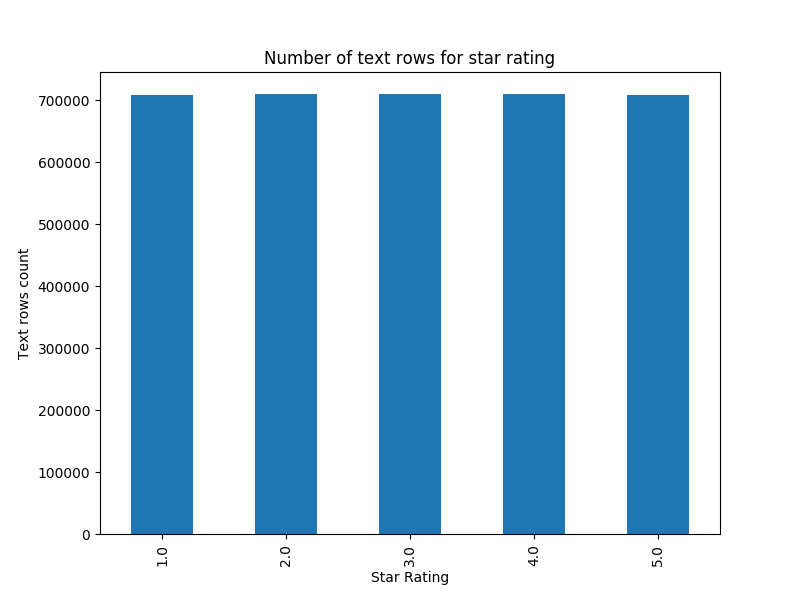

In [26]:
%matplot plt

In [27]:
df_new.write.orc("s3://yelp-dataset-urc/yelp_academic_dataset_review_shrunk/")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
s